In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train= pd.read_csv('./X_train_aggregated.csv',  index_col=0)
X_test= pd.read_csv('./X_test_aggregated.csv',  index_col=0)
y_train= pd.read_csv('./y_train_agg.csv')
y_test= pd.read_csv('./y_test_agg.csv')
X_test.fillna(0,inplace=True)

In [6]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

steps = [('rfc', RandomForestClassifier(n_estimators = 3, criterion = 'entropy', 
                                        random_state = 0,class_weight='balanced'))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)  #criterion = 'gini'

In [10]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [11]:

print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

train MAE: 1.18e-02
train MSE: 1.18e-02
train R2: 0.860
test MAE: 7.49e-02
test MSE: 7.49e-02
test R2: 0.131
Accuracy: 0.9251386321626618


# Confusion_matrix

In [12]:
confusion_matrix(y_test, y_test_pred)

array([[950,  29],
       [ 52,  51]])

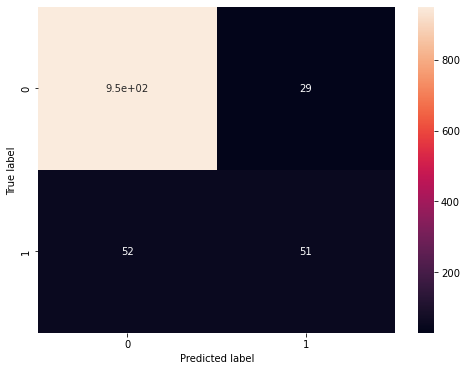

In [13]:

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [37]:
feat_labels = X_train.columns
importances = model.steps[0][1].feature_importances_
indices = np.argsort(importances)[::-1]
res=[]
for f in range(X_train.shape[1]):
    #print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    res.append([feat_labels[indices[f]], importances[indices[f]]])
df_importances=pd.DataFrame(res)
threshold = 0.025
list(df_importances[df_importances[1]>threshold ][0])# feature importance > threshold 

['MaxHospitalDays',
 'TotalInscClaimAmtReimbursed',
 'TotalIPAnnualReimbursementAmt',
 'TotalIPAnnualDeductibleAmtdf',
 'OPAnnualReimbursementAmt_sum']

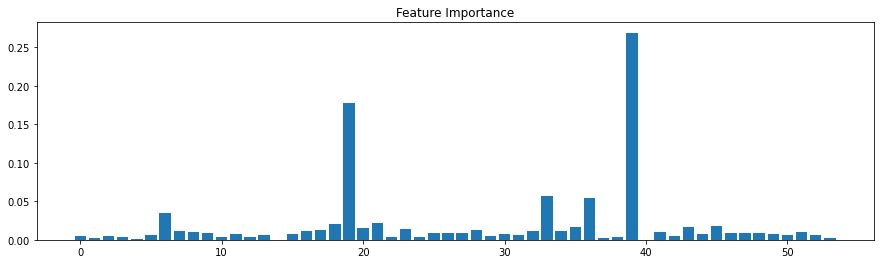

In [34]:
# plot feature importance
plt.figure(figsize=(15,4))
plt.bar([x for x in range(len(importances))], importances)
plt.title('Feature Importance')

plt.show()

# roc_auc_score

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])  
roc_auc_score_test  = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print('roc_auc_score for the train dataset: {:.2f}'.format(roc_auc_score_train))
print('roc_auc_score for the test dataset: {:.2f}'.format(roc_auc_score_test))

roc_auc_score for the train dataset: 0.99
roc_auc_score for the test dataset: 0.83


Text(0.5, 1.0, 'ROC Curve')

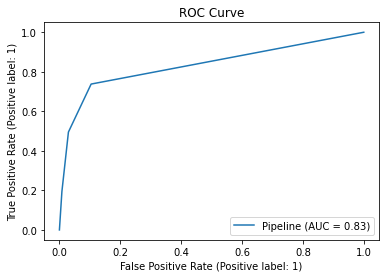

In [20]:
from sklearn.metrics import plot_roc_curve  
plot_roc_curve(model, X_test, y_test)
plt.title('ROC Curve')

In [22]:
y_test_proba = model.predict_proba(X_test)
y_score = y_test_proba[:, 1]

PR-AUC is 0.57


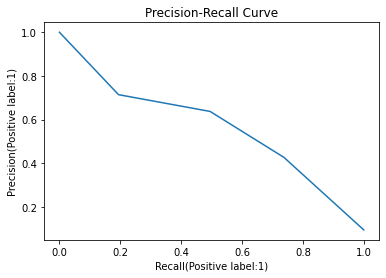

In [23]:
from sklearn.metrics import precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

from sklearn.metrics import auc,plot_precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print('PR-AUC is {:.2f}'.format(auc_precision_recall))

# plot PR curve
plt.plot(recall, precision)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve')
plt.show()


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       979
           1       0.64      0.50      0.56       103

    accuracy                           0.93      1082
   macro avg       0.79      0.73      0.76      1082
weighted avg       0.92      0.93      0.92      1082

